# ML modeles summarize
Conny Lin | June 22, 2020

## set up

### local computer

In [1]:
# import local libraries using host specific paths
import socket, sys, time, datetime, os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get paths for local computer
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'

# import local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
from brainstation_capstone.ml.toolbox.mlSOP import test_model
from brainstation_capstone.ml.toolbox.mlSOP import ml_timer
from brainstation_capstone.ml.toolbox.mlSOP import ModelEvaluation
from brainstation_capstone.etl.datatransform import Nutcracker

# local constants 
from brainstation_capstone.system import host_paths
LOCALPATHS = host_paths.get(hostname)
DATA_DIR = os.path.join(LOCALPATHS['Capstone'], 'data')
ML_MODELS = ['MLPClassifierSDG', 'MLPClassifierADAM', 'GradientBoostingClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'LogisticRegression','RidgeClassifier','DecisionTreeClassifier', 'SVC']

# report latest run
print(f'last ran on: {datetime.datetime.now()} PT')# import local libraries using host specific paths

getting host computer specific paths
last ran on: 2020-06-22 21:55:23.027344 PT


# download and check all models are intact

In [160]:
for model_name in ML_MODELS:
    ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    if not os.path.isfile(ml_model_path):
       print(f'can not find {model_name}')
print('complete checking')

complete checking


In [165]:
for model_name in ML_MODELS:
    ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    model_eval_obj = pickle.load(open(ml_model_path,'rb'))
    print(f'\n{model_name}')
    print(f'\t{model_eval_obj.model.get_params()}')
print('\ncomplete checking')


MLPClassifierSDG
	{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.8, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 1e-05, 'random_state': 318, 'shuffle': True, 'solver': 'sgd', 'tol': 1e-08, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}

MLPClassifierADAM
	{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.8, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 1e-05, 'random_state': 318, 'shuffle': True, 'solver': 'adam', 'tol': 1e-08, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}

Gra

In [6]:
# update data dir to local machine
for model_name in ML_MODELS:
    print(f'update data dir to local {model_name}')
    ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    model_eval_obj = pickle.load(open(ml_model_path,'rb'))
    model_eval_obj.update_data_dir(DATA_DIR)
    print(model_eval_obj.data_dir)
print('\ncomplete checking')

update data dir to local MLPClassifierSDG
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local MLPClassifierADAM
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local GradientBoostingClassifier
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local RandomForestClassifier
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local BaggingClassifier
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local LogisticRegression
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local RidgeClassifier
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local DecisionTreeClassifier
/Users/connylin/

In [7]:
DATA_DIR != ml_model_path

True

# Logistic Regression 

In [ ]:
ml_model_path = os.path.join(data_dir, 'ml_eval_results', 
                    'LogisticRegression_eval.pickle')
model_eval_obj = pickle.load(open(ml_model_path,'rb'))
model = model_eval_obj.model

In [155]:
print('LogisticRegression attributes:')
print(f'\tintercept: {model.intercept_}')
print(f'\tclasses: {model.classes_}')
print(f'\tn_iter: {model.n_iter_}')
print(f'\tmodel: {model}')

LogisticRegression attributes:
	intercept: [-0.08135427]
	classes: [0. 1.]
	n_iter: [46]
	model: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=318, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Logistic Regression top features

In [53]:
# get column names
nutcracker = Nutcracker()
X_columns = nutcracker.names['X']
len(X_columns)
# take a look at predictive value of each parameter
coef_df = pd.DataFrame(model.coef_[0], columns=['coef'], index=X_columns)
coef_df['coef_abs'] = np.absolute(coef_df['coef'].values)
coef_df.sort_values(by='coef_abs', ascending=False)


,coef,coef_abs
width,-3.151507,3.151507
relwidth,2.731500,2.731500
curve,-2.101670,2.101670
midline,1.161986,1.161986
kink,0.690345,0.690345
morphwidth,0.597707,0.597707
area,-0.517751,0.517751
rellength,-0.428565,0.428565
relaspect,-0.356466,0.356466
bias,-0.252349,0.252349


Top features are width, realwidth, and then curve, but previously thought it's curve.


take a look at negative and positive predictors

In [54]:
print('positive predctors')
coef_df.loc[coef_df['coef'] > 0].sort_values(by=['coef_abs'], ascending=False)


positive predctors


,coef,coef_abs
relwidth,2.731500,2.731500
midline,1.161986,1.161986
kink,0.690345,0.690345
morphwidth,0.597707,0.597707
persistence,0.235085,0.235085
angular,0.187394,0.187394
time,0.128537,0.128537
speed,0.111658,0.111658
length,0.083046,0.083046
aspect,0.077678,0.077678


In [55]:
print('negative predctors')
coef_df.loc[coef_df['coef'] < 0].sort_values(by=['coef_abs'], ascending=False)

negative predctors


,coef,coef_abs
width,-3.151507,3.151507
curve,-2.101670,2.101670
area,-0.517751,0.517751
rellength,-0.428565,0.428565
relaspect,-0.356466,0.356466
bias,-0.252349,0.252349
orient,-0.105091,0.105091
vel_y,-0.009493,0.009493
vel_x,-0.007048,0.007048


In [56]:
# get means of each group to compare
data = nutcracker.loaddata()
data.head()


,etoh,id,mwtid,time,frame,persistence,area,midline,morphwidth,width,...,kink,curve,speed,angular,bias,dir,vel_x,vel_y,orient,crab
0,0,325.0,5562.0,30.660,211.0,29.4,0.121014,0.9811,0.1023,0.2106,...,46.3,29.3,0.1956,23.9,1.0,0.0,-0.1828,-0.0694,15.4,0.0185
1,0,29.0,605.0,14.027,229.0,17.9,0.242028,1.3200,0.1689,0.4671,...,61.9,30.8,0.3136,2.7,1.0,0.0,0.0105,-0.3134,92.2,0.0016
2,0,118.0,725.0,69.963,1727.0,238.8,0.184437,1.2996,0.1221,0.2052,...,14.3,21.7,0.2837,2.0,1.0,0.0,-0.2822,-0.0294,-173.1,0.0045
3,0,537.0,4288.0,37.299,436.0,26.4,0.044469,0.5986,0.0548,0.1377,...,20.0,26.5,0.1934,17.8,1.0,0.0,-0.1910,0.0299,168.5,0.0089
4,0,209.0,4301.0,33.371,227.0,23.7,0.172044,1.2023,0.1316,0.3915,...,44.6,27.2,0.1128,1.9,1.0,0.0,0.1125,-0.0083,6.4,0.0207


In [57]:
data_mean_by_etoh = data.groupby('etoh').agg('mean').transpose()
data_mean_by_etoh['etoh_diff'] = data_mean_by_etoh.iloc[:,1] - data_mean_by_etoh.iloc[:,0]
# get etoh diff
etoh_diff = data_mean_by_etoh.loc[coef_df.index.values,'etoh_diff']
# merge to coef_df
coef_df = coef_df.join(etoh_diff)


In [59]:
#
print('positive predctors')
display(coef_df.loc[coef_df['coef'] > 0].sort_values(by=['coef_abs'], ascending=False))
print('negative predctors')
display(coef_df.loc[coef_df['coef'] < 0].sort_values(by=['coef_abs'], ascending=False))

positive predctors


,coef,coef_abs,etoh_diff
relwidth,2.731500,2.731500,-0.017748
midline,1.161986,1.161986,0.000313
kink,0.690345,0.690345,-10.470617
morphwidth,0.597707,0.597707,-0.005508
persistence,0.235085,0.235085,4.230275
angular,0.187394,0.187394,-2.862369
time,0.128537,0.128537,1.278580
speed,0.111658,0.111658,-0.023827
length,0.083046,0.083046,0.065057
aspect,0.077678,0.077678,-0.087956


negative predctors


,coef,coef_abs,etoh_diff
width,-3.151507,3.151507,-0.069808
curve,-2.101670,2.101670,-12.158920
area,-0.517751,0.517751,-0.006259
rellength,-0.428565,0.428565,-0.001260
relaspect,-0.356466,0.356466,-0.017540
bias,-0.252349,0.252349,-0.051480
orient,-0.105091,0.105091,-2.909403
vel_y,-0.009493,0.009493,0.000347
vel_x,-0.007048,0.007048,0.000657


Mean does not give you the right measure. Machine learning predictions does not correlates with mean differences.

Calculate significance of each values + p values


In [61]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [117]:
anova_lm_result

,df,sum_sq,mean_sq,F,PR(>F)
etoh,1.0,15.886795,15.886795,45791.474343,0.0
Residual,1999998.0,693.874997,0.000347,NaN,NaN


In [120]:
coef_df['pvalue_anova'] = np.empty(coef_df.shape[0])
coef_df['F'] = np.empty(coef_df.shape[0])
for feature in coef_df.index.values:
    data_lm = ols(f'{feature} ~ etoh', data=data).fit()
    anova_lm_result = anova_lm(data_lm)
    coef_df.loc[feature, 'pvalue_anova'] = anova_lm_result.loc['etoh','PR(>F)']
    coef_df.loc[feature, 'F'] = anova_lm_result.loc['etoh','F']
coef_df

,coef,coef_abs,etoh_diff,pvalue_anova,F
time,0.128537,0.128537,1.278580,3.714041e-262,1.196748e+03
persistence,0.235085,0.235085,4.230275,4.190496e-249,1.136656e+03
area,-0.517751,0.517751,-0.006259,0.000000e+00,1.108624e+04
midline,1.161986,1.161986,0.000313,2.532094e-01,1.305509e+00
morphwidth,0.597707,0.597707,-0.005508,0.000000e+00,1.624879e+04
width,-3.151507,3.151507,-0.069808,0.000000e+00,3.356777e+05
relwidth,2.731500,2.731500,-0.017748,0.000000e+00,1.610303e+03
length,0.083046,0.083046,0.065057,0.000000e+00,5.246570e+04
rellength,-0.428565,0.428565,-0.001260,8.150887e-15,6.029944e+01
aspect,0.077678,0.077678,-0.087956,0.000000e+00,2.791515e+05


If logistic regression model coef strength is correlated with p value significance strength, we would expect the higher the coef, the lower the p value (negative relationship).

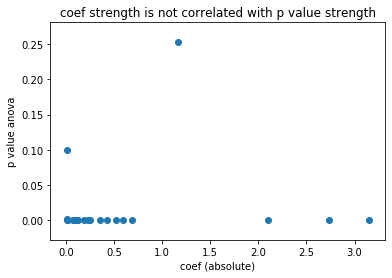

In [84]:
# correlation bewteen pvalue and coef abs
plt.figure()
plt.scatter(coef_df['coef_abs'], coef_df['pvalue_anova'])
plt.xlabel('coef (absolute)')
plt.ylabel('p value anova')
plt.title('coef strength is not correlated with p value strength')
plt.show()

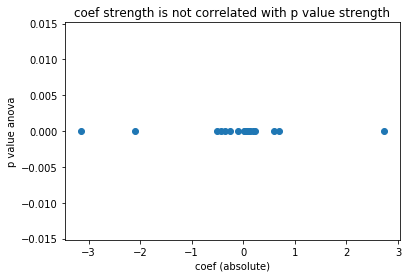

In [122]:
# take out outlier to see the lower values
coef_df_trim = coef_df.loc[coef_df['pvalue_anova'] < 0.000005,:].copy()
# correlation bewteen pvalue and coef abs
plt.figure()
plt.scatter(coef_df_trim['coef_abs'], coef_df_trim['pvalue_anova'])
plt.xlabel('coef (absolute)')
plt.ylabel('p value anova')
plt.title('coef strength is not correlated with p value strength')
plt.show()

In [121]:
# export the df table for graphing in excel
coef_df.to_csv(os.path.join(data_dir, 'table_LogisticRegression_coef_anova_p.csv'))

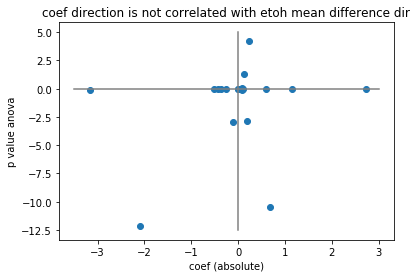

In [128]:
# correlation bewteen pvalue and coef abs
plt.figure()
plt.scatter(coef_df['coef'], coef_df['etoh_diff'])
plt.plot([-3.5, 3], [0, 0], color='gray')
plt.plot([0, 0],[-12.5, 5], color='gray')
plt.xlabel('coef (absolute)')
plt.ylabel('p value anova')
plt.title('coef direction is not correlated with etoh mean difference dir')
plt.show()

In [131]:
# plot standardized values and error bar
# get transformed data
nutcracker.mldata(feature_reduction='None')


None
None


(array([[-0.19370346, -0.01968672,  0.18197568, ...,  0.16403668,
         -0.3220815 , -0.79509773],
        [-0.0034903 ,  0.5302525 , -0.70344521, ...,  0.72855647,
          1.49370758, -0.33931424],
        [ 1.53550704,  1.31071137,  0.85580702, ..., -0.15912074,
         -0.01956178, -0.42411116],
        ...,
        [-0.29745609,  0.02476325, -0.28026611, ..., -1.0159572 ,
          0.23264978, -0.60960445],
        [ 0.74007021,  0.8780994 , -0.07844223, ...,  2.13315146,
          1.08386379,  0.41855831],
        [ 0.25589127,  0.83985175, -0.17284372, ..., -0.04648496,
          1.44608252, -0.81629696]]),
 array([[ 0.91299126, -0.05741751,  1.04135479, ...,  0.4322171 ,
          0.35137703, -0.72090041],
        [ 0.3596439 ,  1.08484347,  0.03874583, ...,  1.61087008,
         -0.38580517,  1.08633412],
        [ 0.58444127,  1.34223984,  0.28288762, ...,  0.6527955 ,
         -1.01029709,  0.74714641],
        ...,
        [-0.47037714, -0.61510964, -0.57323625, ...,  

In [154]:
# use X_test_scaled set to proof
X_train = pd.DataFrame(nutcracker.X_train_scaled, columns=nutcracker.names['X'])
X_train['etoh'] = nutcracker.y_train
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   area        1600000 non-null  float64
 1   midline     1600000 non-null  float64
 2   morphwidth  1600000 non-null  float64
 3   width       1600000 non-null  float64
 4   relwidth    1600000 non-null  float64
 5   length      1600000 non-null  float64
 6   rellength   1600000 non-null  float64
 7   aspect      1600000 non-null  float64
 8   relaspect   1600000 non-null  float64
 9   kink        1600000 non-null  float64
 10  curve       1600000 non-null  float64
 11  speed       1600000 non-null  float64
 12  angular     1600000 non-null  float64
 13  bias        1600000 non-null  float64
 14  dir         1600000 non-null  float64
 15  vel_x       1600000 non-null  float64
 16  vel_y       1600000 non-null  float64
 17  crab        1600000 non-null  float64
 18  etoh        1600000 no

In [166]:
# TODO: do anova on scaled data


# get predictions compare which ones are mistaken by which model


In [2]:
# get predictions from each model
predictions = dict()
# for model_name in ML_MODELS:
for model_name in ML_MODELS:
    print(f'\n{model_name} ----- ')
    ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    model_eval_obj = pickle.load(open(ml_model_path,'rb'))
    model_eval_obj.update_data_dir(DATA_DIR)
    predictions[model_name] = model_eval_obj.predict()



MLPClassifierSDG ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
total time: 0.012 min

MLPClassifierADAM ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
total time: 0.013 min

GradientBoostingClassifier ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
total time: 0.072 min

RandomForestClassifier ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
total time: 0.549 min

BaggingClassifier ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent worker

In [3]:
predictions = pd.DataFrame(predictions)
predictions

,MLPClassifierSDG,MLPClassifierADAM,GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,LogisticRegression,RidgeClassifier,DecisionTreeClassifier,SVC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
399995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
399997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# save this cause the above takes a long time to run
predictions.to_csv(os.path.join(DATA_DIR, 'predictions_by_model.csv'), index=False)

reload data and start fresh

In [4]:
# reload
predictions = pd.read_csv(os.path.join(DATA_DIR, 'predictions_by_model.csv'), index_col=None)


In [5]:
# load a model data to test
model_name = 'MLPClassifierADAM'
ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', model_name+'_eval.pickle')
model_eval_obj = pickle.load(open(ml_model_path,'rb'))
model_eval_obj.update_data_dir(DATA_DIR)
model_eval_obj.load_data()

loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed


In [7]:
# compare which ones are wrong predictions
# get right prediction
correct_answer = np.squeeze(model_eval_obj.data['y_test'])
prediction_wrong = predictions.copy()
for c in prediction_wrong.columns:
    i = prediction_wrong[c] != correct_answer
    prediction_wrong[c] = i
ind_all_wrong = prediction_wrong.index[prediction_wrong.sum(axis=1) == prediction_wrong.shape[1]]

In [8]:
print(f'number of predictions all models got wrong: {ind_all_wrong.shape[0]}')
print(f'% of predictions all models got wrong: {ind_all_wrong.shape[0]/predictions.shape[0]*100}')

number of predictions all models got wrong: 9542
% of predictions all models got wrong: 2.3855


In [9]:
print('model incorect prediction %:')
prediction_wrong.sum(axis=0)/prediction_wrong.shape[0]*100

model incorect prediction %:


MLPClassifierSDG               8.64850
MLPClassifierADAM              8.30525
GradientBoostingClassifier     9.93575
RandomForestClassifier        10.19750
BaggingClassifier             10.79750
LogisticRegression            13.09275
RidgeClassifier               13.35575
DecisionTreeClassifier        19.18075
SVC                           24.78475
dtype: float64

In [72]:
ind_all_correct = prediction_wrong.index[prediction_wrong.sum(axis=1) == 0]
print(f'number of predictions all models got correct: {ind_all_correct.shape[0]}')
print(f'% of predictions all models got wrong: {ind_all_correct.shape[0]/predictions.shape[0]*100}')

number of predictions all models got correct: 247960
% of predictions all models got wrong: 61.99


Int64Index([     0,      5,      6,      7,      8,     11,     13,     14,
                16,     22,
            ...
            399989, 399990, 399991, 399992, 399994, 399995, 399996, 399997,
            399998, 399999],
           dtype='int64', length=247960)

Who are all the animals that all models predicted wrong. Do they come from certain experiments?

In [31]:
# get data frame with wrongly predicted data
nutcracker = Nutcracker()
nutcracker.mldata(feature_reduction='keep_identifier')
test_data = pd.DataFrame(nutcracker.X_test, columns=nutcracker.names['X'])
test_data['etoh'] = nutcracker.y_test

keep_identifier
keep_identifier


In [79]:
# get all wrong mean
test_data_wrongly_predicted = test_data.loc[ind_all_wrong,:].copy()
mean_wrong = test_data_wrongly_predicted.groupby(by='etoh').agg('mean').transpose()
mean_wrong.columns = ['normal_all_wrong','etoh_all_wrong']
mean_wrong['diff_wrong'] = mean_wrong['etoh_all_wrong'] - mean_wrong['normal_all_wrong']
# get all correct mean
test_data_all_correct_predicted = test_data.loc[ind_all_correct,:].copy()
mean_all_correct = test_data_all_correct_predicted.groupby(by='etoh').agg('mean').transpose()
mean_all_correct.columns = ['normal_all_correct','etoh_all_correct']
mean_all_correct['diff_correct'] = mean_all_correct['etoh_all_correct'] - mean_all_correct['normal_all_correct']

mean_wrong.join(mean_all_correct)

,normal_all_wrong,etoh_all_wrong,diff_wrong,normal_all_correct,etoh_all_correct,diff_correct
id,226.633105,184.469372,-42.163733,291.037444,188.686827,-102.350616
mwtid,3878.125000,4127.544048,249.419048,3941.158322,4423.416612,482.258290
frame,924.460411,987.761604,63.301193,916.939694,974.384769,57.445075
area,0.136808,0.140146,0.003337,0.149418,0.139351,-0.010067
midline,1.069687,1.045078,-0.024609,1.093439,1.111592,0.018154
morphwidth,0.106420,0.113320,0.006900,0.114828,0.103762,-0.011066
width,0.163479,0.268216,0.104738,0.276249,0.150895,-0.125354
relwidth,0.841834,1.042277,0.200442,0.997952,0.845545,-0.152407
length,1.041586,0.908182,-0.133405,0.949092,1.088200,0.139108
rellength,1.054186,0.996153,-0.058033,1.012587,1.043717,0.031131


the all wrong predictions have opposite trend (in diff_wrong) than diff_correct

Are they from the same plates?

In [102]:
mwtid_count = test_data_wrongly_predicted['mwtid'].value_counts()
mwtid_summary = pd.DataFrame({'count': mwtid_count,
                                'pct': (mwtid_count.values / mwtid_count.sum()) * 100
                                })
mwtid_summary

,count,pct
5809.0,228,2.389436
2283.0,226,2.368476
6671.0,207,2.169357
5818.0,145,1.519598
6088.0,143,1.498638
...,...,...
3048.0,1,0.010480
2123.0,1,0.010480
5779.0,1,0.010480
4641.0,1,0.010480


In [116]:
# find out how many worms are in each mwt, and % of worms wrong
# code all wrong -1, all correct 1
test_data['all_predict_wrong'] = np.zeros(test_data.shape[0],dtype=int)
test_data.loc[ind_all_wrong, 'all_predict_wrong'] = 1
test_data['all_predict_correct'] = np.zeros(test_data.shape[0],dtype=int)
test_data.loc[ind_all_correct, 'all_predict_correct'] = 1
test_data

,id,mwtid,frame,area,midline,morphwidth,width,relwidth,length,rellength,...,angular,bias,dir,vel_x,vel_y,crab,etoh,all_predict,all_predict_wrong,all_predict_correct
0,74.0,3094.0,1212.0,0.181521,1.0693,0.1429,0.1026,0.494,1.0584,1.019,...,2.0,1.0,0.002,0.0642,0.0537,0.0022,1,1,0,1
1,85.0,618.0,553.0,0.158193,1.2903,0.1121,0.2835,1.173,1.1988,0.991,...,1.3,1.0,0.001,0.2400,-0.0562,0.0363,0,0,0,0
2,401.0,1429.0,2413.0,0.167670,1.3401,0.1196,0.3348,0.931,1.2312,1.187,...,10.5,1.0,0.000,0.0971,-0.1493,0.0299,0,0,0,0
3,50.0,2114.0,1230.0,0.173502,1.0740,0.1446,0.2133,0.873,0.7560,0.846,...,0.6,0.0,0.000,-0.0010,-0.0208,0.0012,1,0,0,0
4,194.0,5328.0,909.0,0.166941,1.1888,0.1308,0.2727,1.104,1.1259,0.948,...,0.6,1.0,0.000,0.0934,-0.1770,0.0156,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,581.0,1816.0,882.0,0.061236,0.5856,0.0664,0.1269,0.708,0.5400,0.849,...,10.4,1.0,0.000,0.0744,0.0838,0.0151,0,1,0,1
399996,13.0,937.0,1302.0,0.164025,1.3480,0.0949,0.0864,0.437,1.3527,1.155,...,0.4,0.0,0.000,0.0411,0.0421,0.0221,1,1,0,1
399997,306.0,7046.0,879.0,0.123201,0.9614,0.0933,0.1728,0.636,0.8397,1.050,...,2.1,0.0,0.000,0.0299,0.0412,0.0018,0,1,0,1
399998,70.0,1313.0,168.0,0.087480,0.8967,0.0826,0.3024,1.249,0.6912,0.938,...,13.7,1.0,0.000,0.2069,-0.4146,0.0936,0,1,0,1


In [146]:
predict_summary = test_data.groupby(by='mwtid').sum()
predict_summary = predict_summary[['all_predict_wrong', 'all_predict_correct']].copy()
df = test_data.groupby(by='mwtid').count()
predict_summary['total'] = df.iloc[:,0].values
predict_summary['all_wrong_pct'] = predict_summary['all_predict_wrong']/predict_summary['total']*100
predict_summary['all_correct_pct'] = predict_summary['all_predict_correct']/predict_summary['total']*100
predict_summary

,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct
mwtid,,,,,
0.0,0,162,200,0.000000,81.000000
11.0,13,85,209,6.220096,40.669856
12.0,1,13,53,1.886792,24.528302
13.0,11,79,235,4.680851,33.617021
14.0,0,177,295,0.000000,60.000000
...,...,...,...,...,...
7186.0,0,230,285,0.000000,80.701754
7187.0,0,158,198,0.000000,79.797980
7188.0,0,95,135,0.000000,70.370370


In [147]:
predict_summary.sort_values(by='all_wrong_pct', ascending=False)

,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct
mwtid,,,,,
4302.0,11,0,11,100.000000,0.000000
4297.0,80,0,102,78.431373,0.000000
4298.0,101,0,136,74.264706,0.000000
4299.0,31,1,45,68.888889,2.222222
4300.0,83,0,122,68.032787,0.000000
...,...,...,...,...,...
5077.0,0,278,322,0.000000,86.335404
4863.0,0,640,779,0.000000,82.156611
4862.0,0,565,679,0.000000,83.210604


Seems like there is a trend. Plot

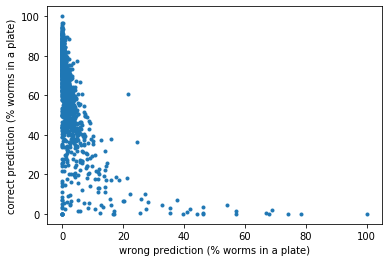

In [155]:
plt.figure()
plt.scatter(predict_summary['all_wrong_pct'], predict_summary['all_correct_pct'],
            marker='.')
plt.xlabel('wrong prediction (% worms in a plate)')
plt.ylabel('correct prediction (% worms in a plate)')
plt.show()

Seems like there are some association between wrong prediction and plates. Lets do some stats


In [161]:
from scipy import stats
r = stats.pearsonr(predict_summary['all_wrong_pct'],predict_summary['all_correct_pct'])
print(f'rho = {r[0]}\np = {r[1]}')

rho = -0.5463440908885075
p = 3.2829736322530456e-106


The relationship is significant. Let's explore which plates those are. take a look at the image of 100% predicted correct plate vs 100% predicted wrong plate. The index to mwtpat is in "mwtpath_cobolt.csv"


In [163]:
mwtpath = pd.read_csv(os.path.join(DATA_DIR, 'mwtpath_cobolt.csv'))
print(mwtpath.shape)
mwtpath

(7294, 2)


,Unnamed: 0,mwtpath
0,0,/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01...
1,1,/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01...
2,2,/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01...
3,3,/Volumes/COBOLT/MWT/20110906C_SS_10s30x10s10s_...
4,4,/Volumes/COBOLT/MWT/20110906C_SS_10s30x10s10s_...
...,...,...
7289,7289,/Volumes/COBOLT/MWT to check/20140819C_SM_100s...
7290,7290,/Volumes/COBOLT/MWT to check/20140819C_SM_100s...
7291,7291,/Volumes/COBOLT/MWT to check/20140819C_SM_100s...
7292,7292,/Volumes/COBOLT/MWT to check/20140819C_SM_100s...


In [169]:
# get index to over 75% wrong prediction and 3 100% wrong
# get top 5 wrong pred
df = predict_summary.sort_values(by='all_wrong_pct', ascending=False)
display(df.iloc[:5])
mwtid_wrong = df.index[:5]
# get top 5 corr pred
df = predict_summary.sort_values(by='all_correct_pct', ascending=False)
display(df.iloc[:5])
mwtid_correct = df.index[:5]

,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct
mwtid,,,,,
4302.0,11,0,11,100.000000,0.000000
4297.0,80,0,102,78.431373,0.000000
4298.0,101,0,136,74.264706,0.000000
4299.0,31,1,45,68.888889,2.222222
4300.0,83,0,122,68.032787,0.000000


,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct
mwtid,,,,,
4272.0,0,13,13,0.000000,100.000000
2111.0,1,398,412,0.242718,96.601942
5656.0,0,27,28,0.000000,96.428571
5733.0,0,45,47,0.000000,95.744681
6516.0,0,35,37,0.000000,94.594595


In [173]:
# get paths and save
mwtpath_wrong_predict = mwtpath.iloc[mwtid_wrong]
display(mwtpath_wrong_predict)
mwtpath_wrong_predict['mwtpath'].to_csv(os.path.join(DATA_DIR, 'mwtpath_all_wrong_predict.csv'), index=False)
mwtpath_correct_predict = mwtpath.iloc[mwtid_correct]
display(mwtpath_correct_predict)
mwtpath_correct_predict['mwtpath'].to_csv(os.path.join(DATA_DIR, 'mwtpath_all_correct_predict.csv'), index=False)


,Unnamed: 0,mwtpath
4302,4302,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...
4297,4297,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...
4298,4298,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...
4299,4299,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...
4300,4300,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...


,Unnamed: 0,mwtpath
4272,4272,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...
2111,2111,/Volumes/COBOLT/MWT/20130308C_BM_100s30x10s10s...
5656,5656,/Volumes/COBOLT/MWT/20141216B_SI_100s30x10s10s...
5733,5733,/Volumes/COBOLT/MWT/20150901C_ST_100s30x10s10s...
6516,6516,/Volumes/COBOLT/MWT/20140730C_SM_100s30x10s10s...


## see which worms are not predicted right, get their videos